## 1.2 Experimental Validation

In [1]:
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt

import generator
from mnist import MNIST

%config InlineBackend.figure_format='retina'

In [2]:
SIZE = 28

def display_image(sample):
    pixels = sample.reshape((SIZE, SIZE))
    plt.imshow(pixels, cmap='gray_r')
    plt.show()

Training: (60000, 784)
Testing: (10000, 784)


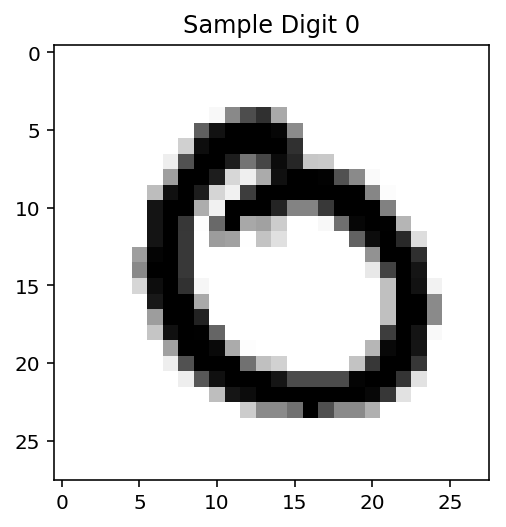

In [3]:
mndata = MNIST('./samples')

train_x, train_y = mndata.load_training()
train_x, train_y = np.array(train_x), np.array(train_y)
print('Training:', train_x.shape)

test_x, test_y = mndata.load_testing()
test_x, test_y = np.array(test_x), np.array(test_y)
print('Testing:', test_x.shape)

index = random.randrange(0, len(train_x))
plt.title('Sample Digit {}'.format(train_y[index]))
display_image(train_x[index])

### 1.2.1 MNIST MSP & PCA Comparison

In [4]:
_, values, right = np.linalg.svd(train_x, full_matrices=False)

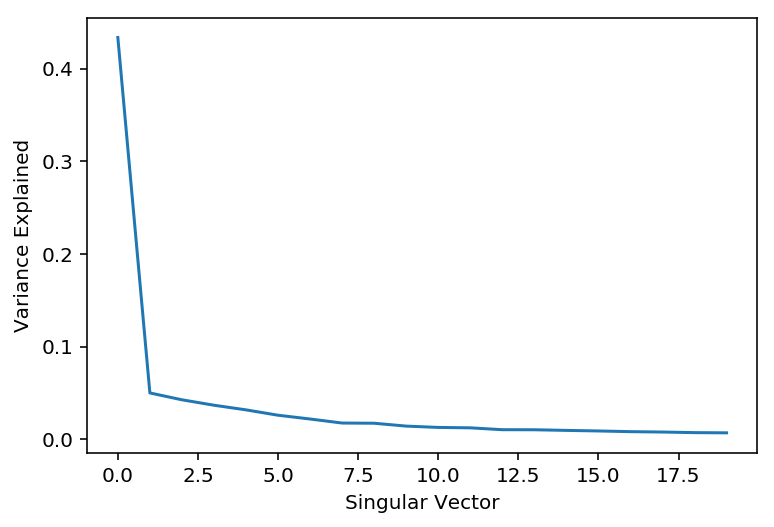

In [5]:
TOP = 20

total_variance = values * values
total_variance /= sum(total_variance)
plt.plot(np.arange(TOP), total_variance[:TOP])

plt.xlabel('Singular Vector')
plt.ylabel('Variance Explained')
plt.show()

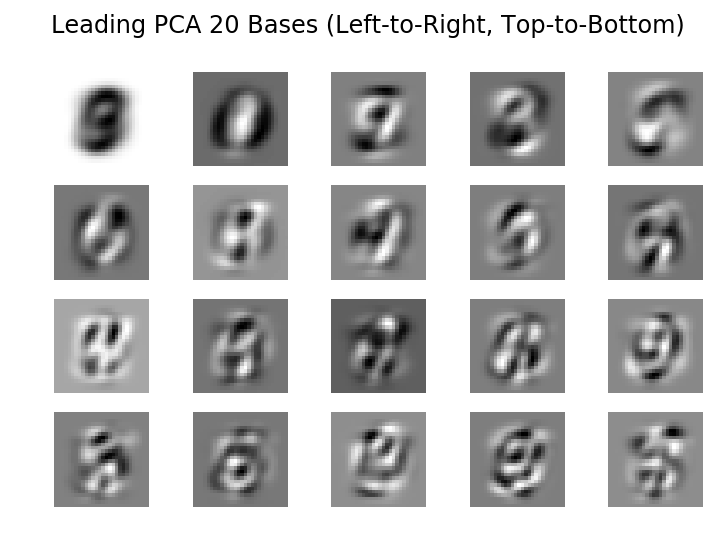

In [6]:
ROWS, COLS = 4, 5

fig, axs = plt.subplots(ROWS, COLS)
for num in range(TOP):
    row, col = num // COLS, num % COLS
    vector = right[num]
    pixels = vector.reshape((SIZE, SIZE))
    axs[row][col].imshow(pixels, cmap='gray_r')
    axs[row][col].axis('off')
    
plt.suptitle('Leading PCA 20 Bases (Left-to-Right, Top-to-Bottom)')
plt.show()

In [29]:
ITERATIONS = 100
objective_values = []

observations = train_x.T
updates = generator.get_dictionary_learning_iterates(observations)
for current in itertools.islice(updates, ITERATIONS):
    value = generator.sum_of_fourth_powers(current @ observations)
    objective_values.append(value)
recovered = current

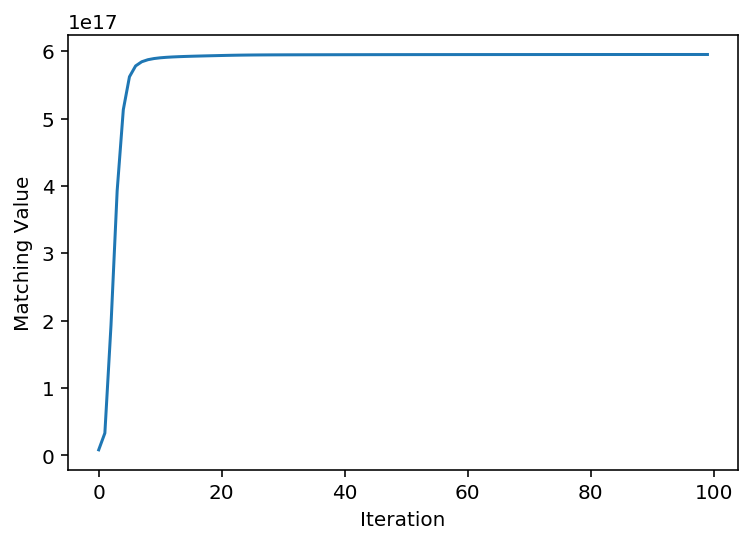

In [30]:
iterations = len(objective_values)
scale = np.arange(iterations)
plt.plot(scale, objective_values)

plt.xlabel('Iteration')
plt.ylabel('Matching Value')
plt.show()

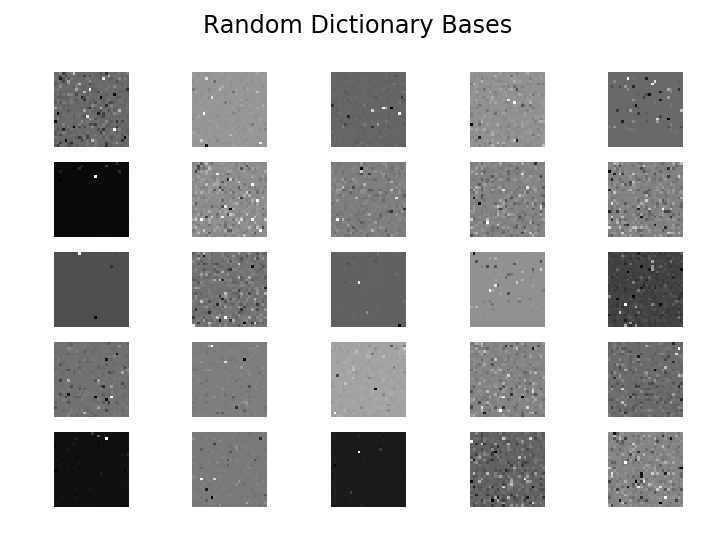

In [32]:
ROWS, COLS = 5, 5

fig, axs = plt.subplots(ROWS, COLS)
for row in range(ROWS):
    for col in range(COLS):
        index = random.randrange(0, len(recovered.T))
        vector = recovered[:,index]
        
        pixels = vector.reshape((SIZE, SIZE))
        axs[row][col].imshow(pixels, cmap='gray_r')
        axs[row][col].axis('off')

plt.suptitle('Random Dictionary Bases')
plt.show()